In [2]:
username = "Alex"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`

In [3]:
using DynamicalSystems, DifferentialEquations

using Statistics
using StaticArrays
using CairoMakie
using JLD

In [3]:
function sigma(x)
    return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
end

function HR(u, p, t)
        
    a, b, c, d, s, xr, r,  I, vs, k1, k2, el_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - k1 * ( x1 - vs ) * sigma(x2) + el_link * ( x2 - x1 )
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - k2 * ( x2 - vs ) * sigma(x1) + el_link * ( x1 - x2 )
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )
    return SVector(du1, du2, du3,
                    du4, du5, du6)
end
Hs(x, k) = Statistics.mean(x) + k * Statistics.std(x)

Hs (generic function with 1 method)

In [4]:
function peaks(x)
    peaks_ = Float64[]
    len_ = length(x)
    for i in range(2, len_ - 1, step = 1)
        if x[i-1] < x[i] > x[i+1]
            push!(peaks_, x[i])
        end
    end
    return peaks_
end

peaks (generic function with 1 method)

In [5]:
function CALCPDF(spikes)
    ϵ = 0.9
    ee_counter = [sum(i->s<=i<s+ϵ, spikes) for s in range(0,4,500000)]
    pdf = ee_counter ./ length(spikes)
    return range(0,4,500000), pdf
end

CALCPDF (generic function with 1 method)

In [6]:
tspan = (0., 500000.)

a = 1.
b = 3.
c = 1.
d = 5.
xr = -1.6
r = 0.01
s = 5.
I = 4.
xv = 2.

k1= -0.17
k2 = k1

-0.17

In [7]:
condition_chaos = SA[   -0.34138005332884996, 0.25075647845490023, 4.441457737482487, -0.7351261577047472, -1.6795500436310609, 4.3584613931735054]

6-element SVector{6, Float64} with indices SOneTo(6):
 -0.34138005332884996
  0.25075647845490023
  4.441457737482487
 -0.7351261577047472
 -1.6795500436310609
  4.3584613931735054

In [8]:
k  = 0
p = SA[a, b, c, d, s, xr, r, I, xv, k1, k2, k]

12-element SVector{12, Float64} with indices SOneTo(12):
  1.0
  3.0
  1.0
  5.0
  5.0
 -1.6
  0.01
  4.0
  2.0
 -0.17
 -0.17
  0.0

In [9]:
prob = ODEProblem(HR, condition_chaos, tspan, p)

ODEProblem with uType SVector{6, Float64} and tType Float64. In-place: false
timespan: (0.0, 500000.0)
u0: 6-element SVector{6, Float64} with indices SOneTo(6):
 -0.34138005332884996
  0.25075647845490023
  4.441457737482487
 -0.7351261577047472
 -1.6795500436310609
  4.3584613931735054

In [10]:
sol = solve(prob, AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11, maxiters = 10000000);

In [11]:
xsum = sol[1, :] + sol[4, :];
println("before: ", length(xsum))

xsum = xsum[floor(Int, length(xsum) / 4):end ]
println("after: ", length(xsum))

before: 6916859
after: 5187646


In [12]:
x1, x2 = sol[1, :], sol[4, :]
println("length x1, x2 before truncate:", length(x1), ", ", length(x2))
x1 = x1[floor(Int, length(x1) / 4):end ]
x2 = x2[floor(Int, length(x2) / 4):end ]
println("length x1, x2 after truncate:", length(x1), ", ", length(x2))

length x1, x2 before truncate:6916859, 6916859
length x1, x2 after truncate:5187646, 5187646


In [13]:
Hs1 = Hs(xsum, 6)

2.63420632631113

In [14]:
CairoMakie.activate!()

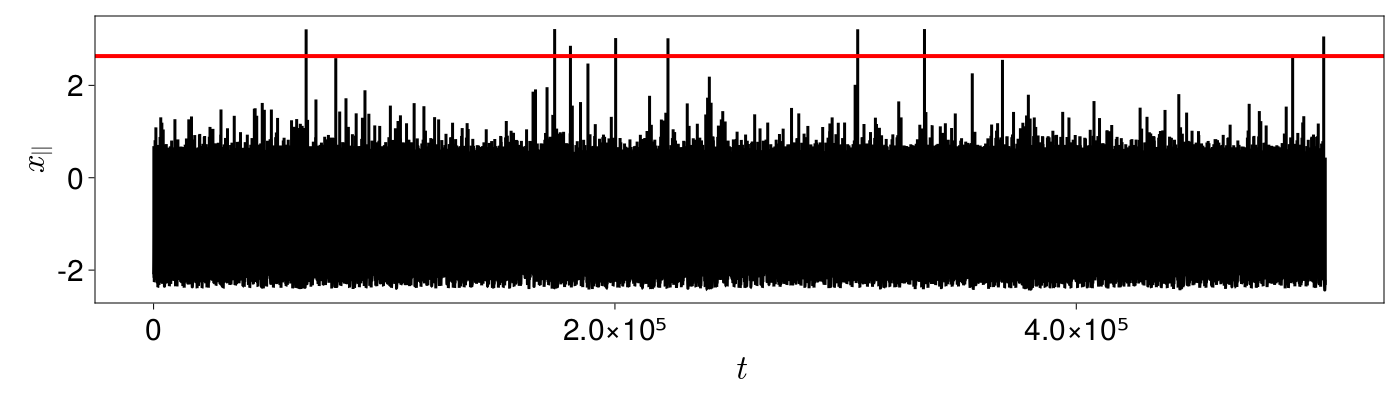

In [15]:
f = Figure(resolution = (1400, 400))

ax = Axis(f[1, 1], xlabel = L"t", ylabel = L"x_{||}",
xlabelsize = 35, ylabelsize = 35,
                xticklabelsize = 30, yticklabelsize = 30)

ax.xgridvisible = false
ax.ygridvisible = false

lines!(ax, xsum[50000:558000], linewidth = 3.0, color = "black")
hlines!(Hs1, color = "red", linewidth = 4.0)
f

In [16]:
using JLD

In [17]:
sel_1, pdf_1 = CALCPDF(xsum)

(0.0:8.000016000032e-6:4.0, [0.05550378726690294, 0.05550301620426683, 0.0555028234386078, 0.055502437907289745, 0.05550224514163071, 0.055502437907289745, 0.05550108854767654, 0.05550089578201751, 0.05550070301635848, 0.05550070301635848  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

In [19]:
length(sel_1), length(pdf_1)

(500000, 500000)

In [18]:
save("sel_presentation.jld", "data", sel_1  )
save("pdf_presentation.jld", "data", pdf_1  )

In [4]:
sel_1 = load("sel_presentation.jld")["data"]
pdf_1 = load("pdf_presentation.jld")["data"];

In [5]:
EE_mapcopy = pdf_1;
EE_mapcopy = [ iszero(x) ? NaN : x for x in EE_mapcopy ];

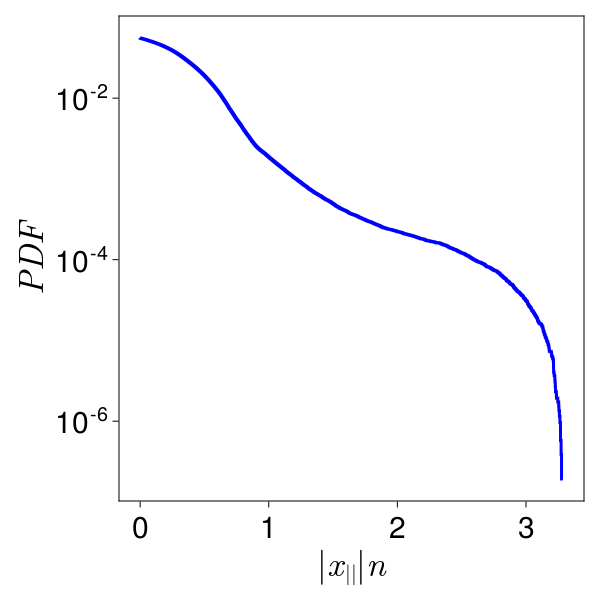

CairoMakie.Screen{IMAGE}


In [11]:
f = Figure(resolution = (600, 600))

ax = Axis(f[1, 1], yscale = log10,
xlabel = L"|x_{||}|n", ylabel = L"PDF",
xlabelsize = 35, ylabelsize = 35,
xticklabelsize = 30, yticklabelsize = 30  )

ax.xgridvisible = false
ax.ygridvisible = false

lines!(sel_1, EE_mapcopy, linewidth = 3.0, color = :blue)

#vlines!(ax, 2.63420632631113, color = "red", linestyle = :dash, linewidth = 3.0)
display(f)

In [8]:
using NPZ

In [9]:
npzwrite("sel_1.npy", sel_1)
npzwrite("pdf_1.npy", pdf_1)

In [34]:
save("pdf_presentation.eps", f)

CairoMakie.Screen{EPS}
